In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
df = pd.read_csv('matching_table/combined_all_formulated_monosaccharide.csv')
df['fischer_projection_DL'] = [x.upper() for x in df['fischer_projection_DL'].values]
df.columns

Index(['csv', 'pdb', 'glycan name', 'residual num', 'size', 'type', 'bound_AB',
       'fischer_projection_DL', 'origin_mono', 'reformulated_standard_mono',
       'carbon_number_PF'],
      dtype='object')

In [3]:
np.sum(df['type'].values == 'linear'), np.sum(df['type'].values != 'linear')

(505, 631)

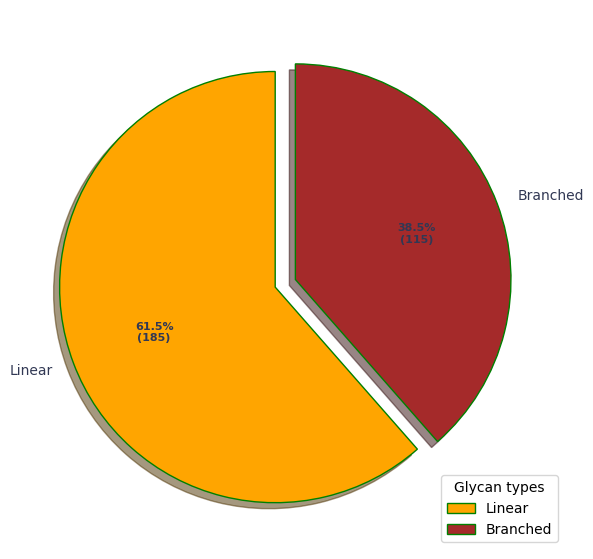

In [4]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
cars = ['Linear', 'Branched']
 
data = [185, 116]
 
 
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "brown")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#313854"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Glycan types",
          loc ="best")
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("")
 
# show plot
plt.show()

In [5]:
df.head()

,csv,pdb,glycan name,residual num,size,type,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF
0,A-D-FUCPNAC,FCA,a-D-FucpNAc-(1-4)-a-D-GalpNac-(1-3)-b-D-Manp-(...,3,11,linear,a,D,fucpnac,fucnac,P
1,A-D-FUCPNAC,FCA,a-D-Quip4N-(1-4)-a-D-GlcpA-(1-6)-a-D-GlcpNAc-(...,1,11,linear,a,D,fucpnac,fucnac,P
2,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,3,11,linear,a,D,galp,gal,P
3,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,7,11,linear,a,D,galp,gal,P
4,A-D-GALP,GLA,a-D-Galp-(1-3)-b-D-GalpNAc-(1-6)-a-D-Glcp-(1-4...,5,11,linear,a,D,galp,gal,P


In [6]:
df_bound = df[['bound_AB']]
df_bound = pd.DataFrame(df_bound.groupby(['bound_AB']).size())
df_bound['Name'] = df_bound.index
df_bound['Value'] = df_bound[[0]]
df_bound.index = range(len(df_bound))
df_bound = df_bound.drop([0], axis=1)
df_bound['type'] = 'bound'

df_project = df[['fischer_projection_DL']]
df_project = pd.DataFrame(df_project.groupby(['fischer_projection_DL']).size())
df_project['Name'] = df_project.index
df_project['Value'] = df_project[[0]]
df_project.index = range(len(df_project))
df_project = df_project.drop([0], axis=1)
df_project['type'] = 'fischer_projection'

df_slash = pd.concat([df_bound, df_project])

import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file


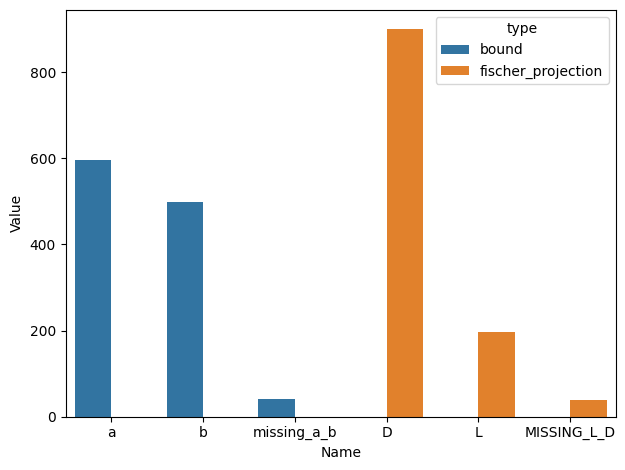

In [7]:
sns.barplot(data=df_slash, x="Name", y="Value", hue="type")
plt.tight_layout()
plt.show()

In [8]:
df

,csv,pdb,glycan name,residual num,size,type,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF
0,A-D-FUCPNAC,FCA,a-D-FucpNAc-(1-4)-a-D-GalpNac-(1-3)-b-D-Manp-(...,3,11,linear,a,D,fucpnac,fucnac,P
1,A-D-FUCPNAC,FCA,a-D-Quip4N-(1-4)-a-D-GlcpA-(1-6)-a-D-GlcpNAc-(...,1,11,linear,a,D,fucpnac,fucnac,P
2,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,3,11,linear,a,D,galp,gal,P
3,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,7,11,linear,a,D,galp,gal,P
4,A-D-GALP,GLA,a-D-Galp-(1-3)-b-D-GalpNAc-(1-6)-a-D-Glcp-(1-4...,5,11,linear,a,D,galp,gal,P
...,...,...,...,...,...,...,...,...,...,...,...
1131,b-D-Manp,BMA,DB9507,4,10,nonlinear,b,D,manp,man,P
1132,b-D-Rhap,RAM,DB9697,1,11,nonlinear,b,D,rhap,rha,P
1133,b-L-Rhap,RAM,DB4717,4,11,nonlinear,b,L,rhap,rha,P
1134,b-L-Rhap,RAM,DB9917,1,11,nonlinear,b,L,rhap,rha,P


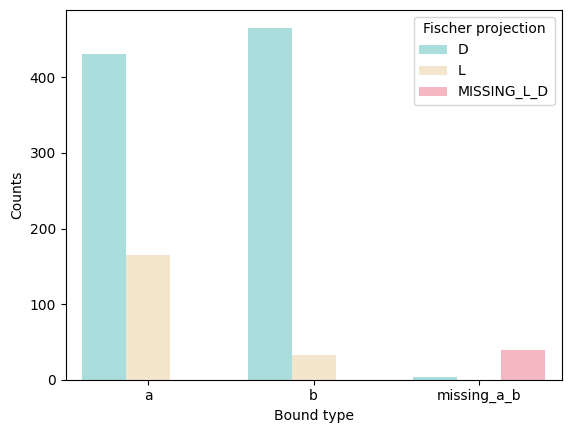

In [9]:
ax = sns.countplot(data=df, x="bound_AB", hue="fischer_projection_DL", palette=['#A0E7E5', '#FBE7C6', '#FFAEBC'])
ax.set(xlabel='Bound type', ylabel='Counts')
ax.legend(title='Fischer projection')


<AxesSubplot: xlabel='fischer_projection_DL', ylabel='count'>

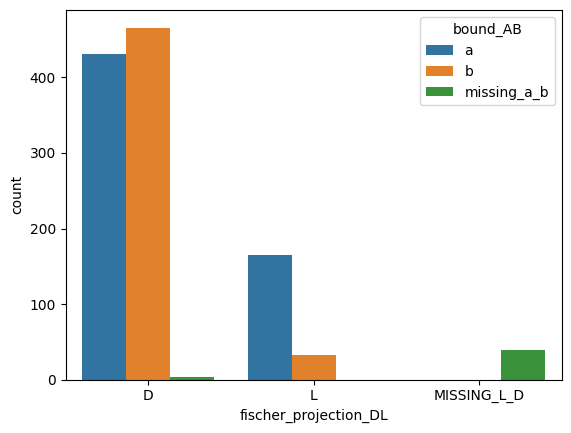

In [10]:
sns.countplot(data=df, x="fischer_projection_DL", hue="bound_AB")


In [11]:
df_standard_mono_count = df[['reformulated_standard_mono']]
df_standard_mono_count = pd.DataFrame(df_standard_mono_count.groupby(['reformulated_standard_mono']).size())
df_standard_mono_count['Name'] = df_standard_mono_count.index
df_standard_mono_count['Value'] = df_standard_mono_count[[0]]
df_standard_mono_count.index = range(len(df_standard_mono_count))
df_standard_mono_count = df_standard_mono_count.drop([0], axis=1)

In [12]:
new_name = []
for i in range(len(df_standard_mono_count)):
    temp_name1 = df_standard_mono_count['Name'].values[i]
    temp_name2 = df_standard_mono_count['Value'].values[i]
    
    new_name.append(temp_name1 + ': '+ str(temp_name2))
df_standard_mono_count['Name'] = new_name

In [13]:
df_standard_mono_count

,Name,Value
0,ara: 10,10
1,fuc: 53,53
2,fucnac: 17,17
3,gal: 221,221
4,gala: 30,30
5,galnac: 38,38
6,glc: 198,198
7,glca: 48,48
8,glcn: 25,25
9,glcnac: 137,137


In [14]:
df_standard_mono_count.max()

Name     xyl: 37
Value        221
dtype: object

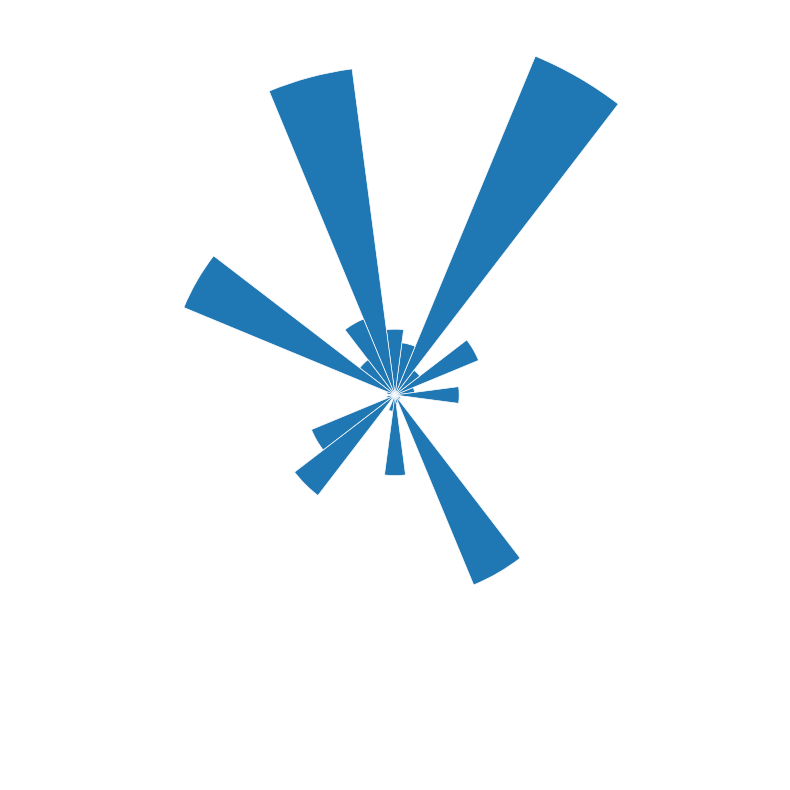

In [15]:
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 170
lowerLimit = 1

# Compute max and min in the dataset
max = df_standard_mono_count['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_standard_mono_count.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2 * np.pi / len(df_standard_mono_count.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_standard_mono_count.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=0.5, 
    edgecolor="white")

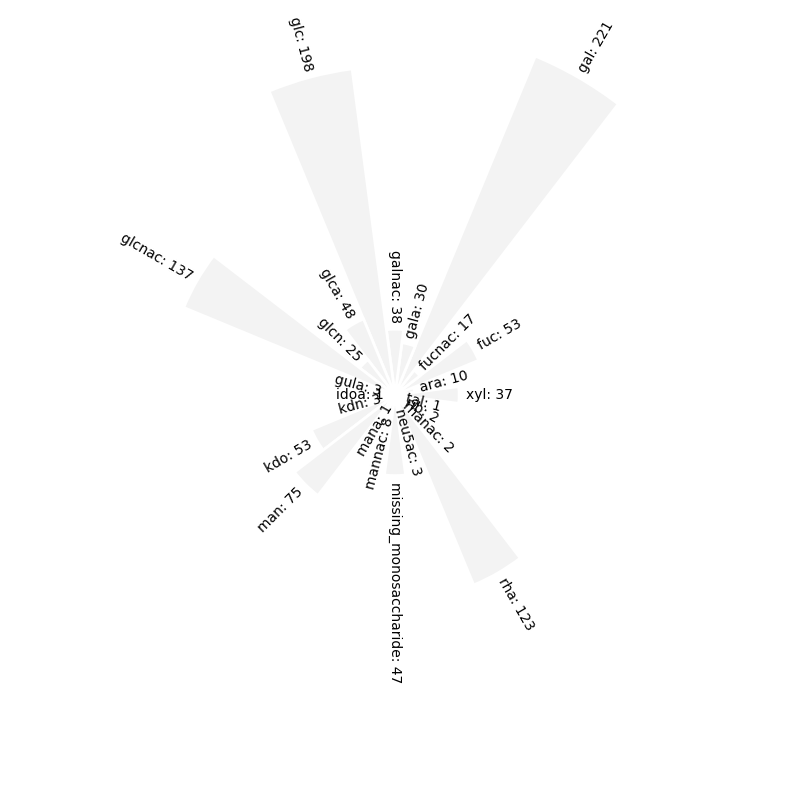

In [16]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#F3F3F3",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_standard_mono_count["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

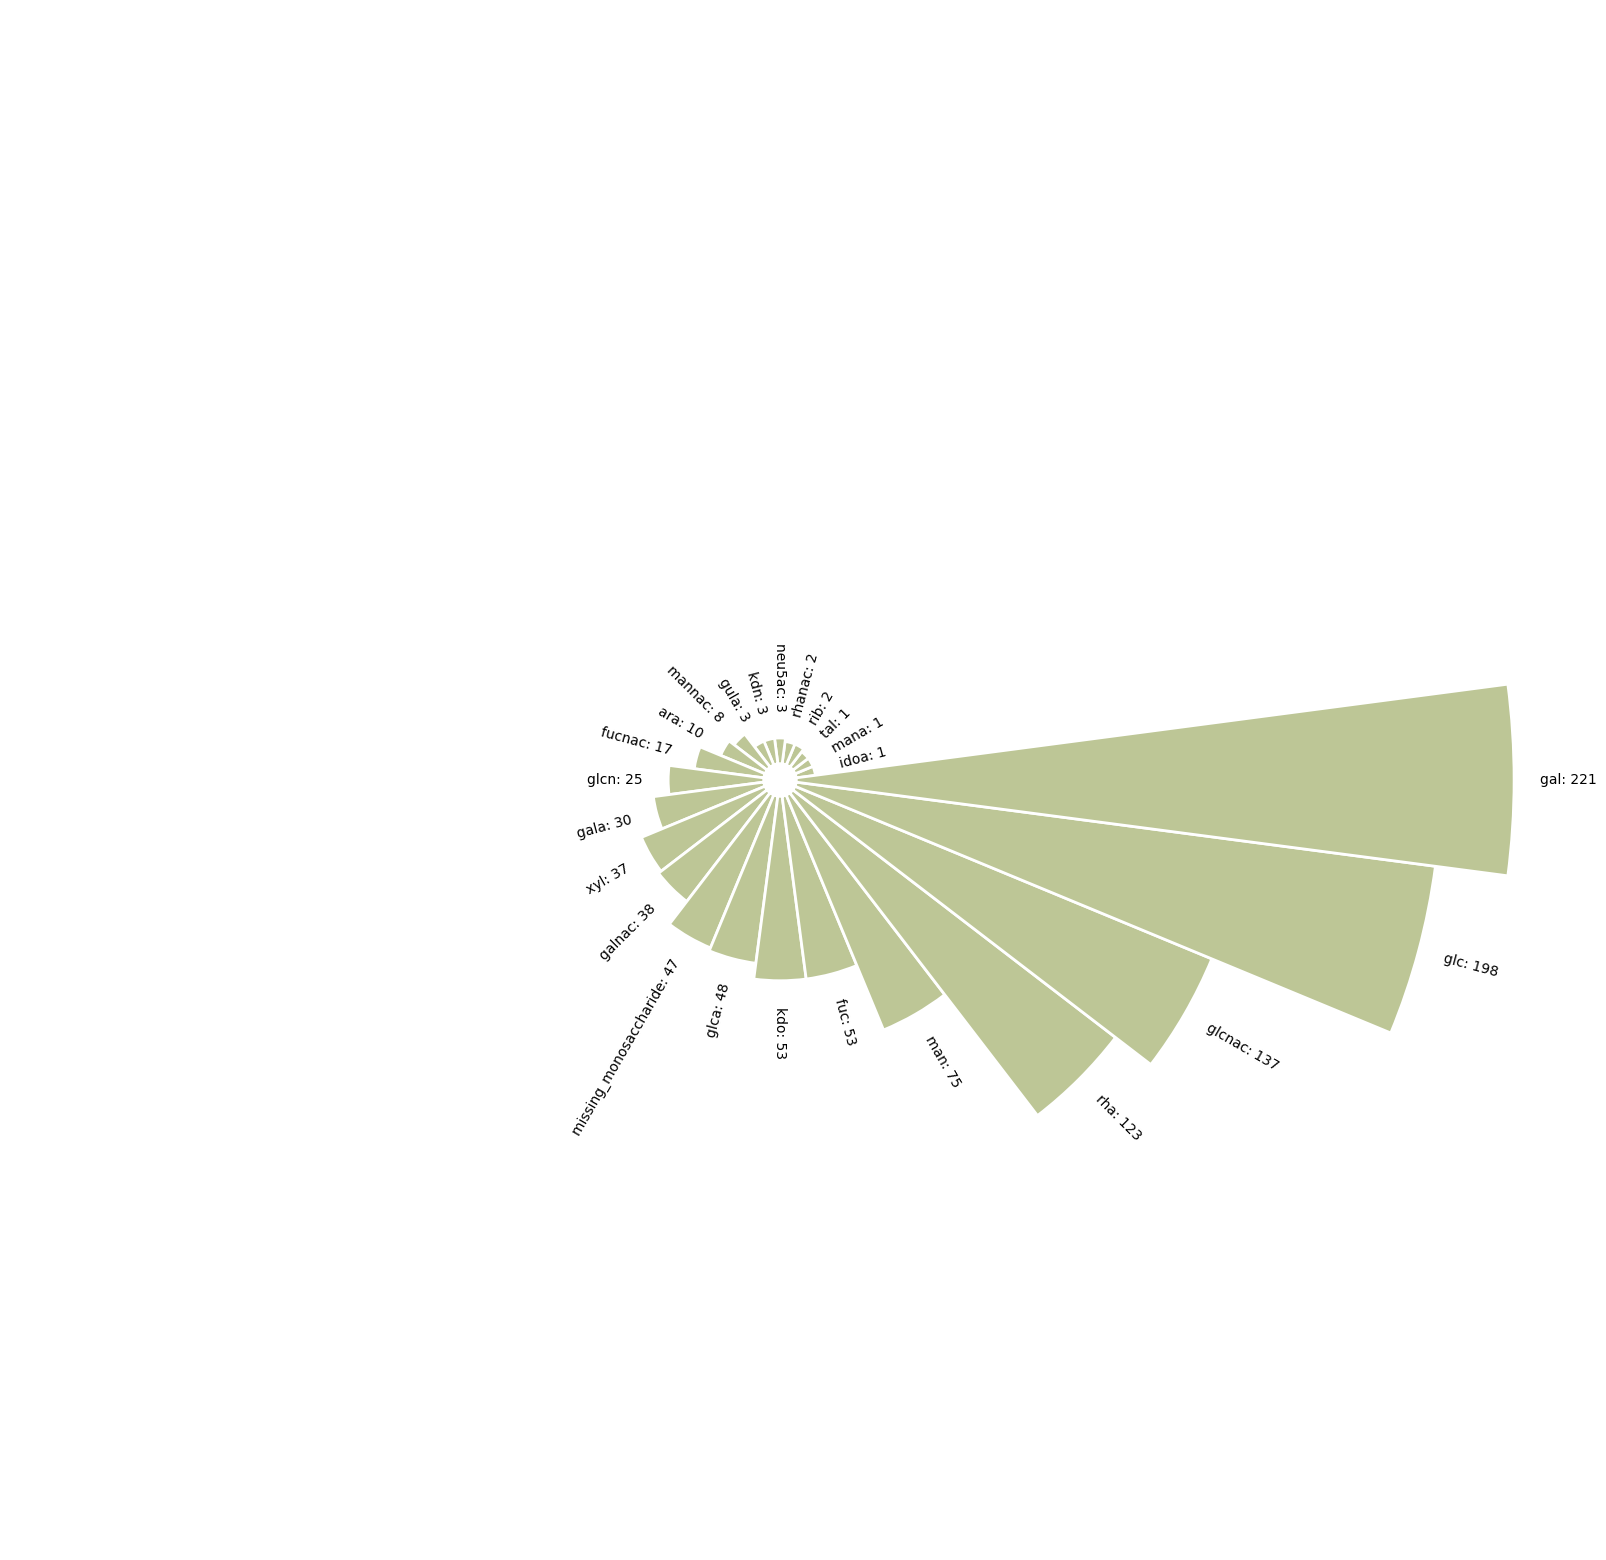

In [17]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset

# Reorder the dataframe
df_standard_mono_count = df_standard_mono_count.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,20))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 200
lowerLimit = 5
labelPadding = 8

# Compute max and min in the dataset
max = df_standard_mono_count['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_standard_mono_count.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_standard_mono_count.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_standard_mono_count.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#BDC696"
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_standard_mono_count["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
#     print(bar, angle, height, label)
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor", )
plt.rcParams.update({'font.size': 15})


In [18]:
df.head()

,csv,pdb,glycan name,residual num,size,type,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF
0,A-D-FUCPNAC,FCA,a-D-FucpNAc-(1-4)-a-D-GalpNac-(1-3)-b-D-Manp-(...,3,11,linear,a,D,fucpnac,fucnac,P
1,A-D-FUCPNAC,FCA,a-D-Quip4N-(1-4)-a-D-GlcpA-(1-6)-a-D-GlcpNAc-(...,1,11,linear,a,D,fucpnac,fucnac,P
2,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,3,11,linear,a,D,galp,gal,P
3,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,7,11,linear,a,D,galp,gal,P
4,A-D-GALP,GLA,a-D-Galp-(1-3)-b-D-GalpNAc-(1-6)-a-D-Glcp-(1-4...,5,11,linear,a,D,galp,gal,P


In [19]:
df_slash

,Name,Value,type
0,a,596,bound
1,b,498,bound
2,missing_a_b,42,bound
0,D,900,fischer_projection
1,L,197,fischer_projection
2,MISSING_L_D,39,fischer_projection


In [20]:
df.head()

,csv,pdb,glycan name,residual num,size,type,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF
0,A-D-FUCPNAC,FCA,a-D-FucpNAc-(1-4)-a-D-GalpNac-(1-3)-b-D-Manp-(...,3,11,linear,a,D,fucpnac,fucnac,P
1,A-D-FUCPNAC,FCA,a-D-Quip4N-(1-4)-a-D-GlcpA-(1-6)-a-D-GlcpNAc-(...,1,11,linear,a,D,fucpnac,fucnac,P
2,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,3,11,linear,a,D,galp,gal,P
3,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,7,11,linear,a,D,galp,gal,P
4,A-D-GALP,GLA,a-D-Galp-(1-3)-b-D-GalpNAc-(1-6)-a-D-Glcp-(1-4...,5,11,linear,a,D,galp,gal,P


In [21]:
df_standard_mono_count

,Name,Value
11,idoa: 1,1
15,mana: 1,1
22,tal: 1,1
21,rib: 2,2
20,rhanac: 2,2
18,neu5ac: 3,3
12,kdn: 3,3
10,gula: 3,3
16,mannac: 8,8
0,ara: 10,10


In [22]:
df

,csv,pdb,glycan name,residual num,size,type,bound_AB,fischer_projection_DL,origin_mono,reformulated_standard_mono,carbon_number_PF
0,A-D-FUCPNAC,FCA,a-D-FucpNAc-(1-4)-a-D-GalpNac-(1-3)-b-D-Manp-(...,3,11,linear,a,D,fucpnac,fucnac,P
1,A-D-FUCPNAC,FCA,a-D-Quip4N-(1-4)-a-D-GlcpA-(1-6)-a-D-GlcpNAc-(...,1,11,linear,a,D,fucpnac,fucnac,P
2,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,3,11,linear,a,D,galp,gal,P
3,A-D-GALP,GLA,a-D-Galp-(1-2)-a-L-Rhap-(1-3)-b-D-Manp-(1-4)-b...,7,11,linear,a,D,galp,gal,P
4,A-D-GALP,GLA,a-D-Galp-(1-3)-b-D-GalpNAc-(1-6)-a-D-Glcp-(1-4...,5,11,linear,a,D,galp,gal,P
...,...,...,...,...,...,...,...,...,...,...,...
1131,b-D-Manp,BMA,DB9507,4,10,nonlinear,b,D,manp,man,P
1132,b-D-Rhap,RAM,DB9697,1,11,nonlinear,b,D,rhap,rha,P
1133,b-L-Rhap,RAM,DB4717,4,11,nonlinear,b,L,rhap,rha,P
1134,b-L-Rhap,RAM,DB9917,1,11,nonlinear,b,L,rhap,rha,P


In [23]:
d = df[['bound_AB', 'fischer_projection_DL']]

In [24]:
np.unique(d['bound_AB'])

array(['a', 'b', 'missing_a_b'], dtype=object)

In [25]:
new_df_heat_map = pd.crosstab(index=d['bound_AB'], columns = df['fischer_projection_DL'])

In [26]:
new_df_heat_map = new_df_heat_map.astype(int)

Text(43.72222222222221, 0.5, 'bound type')

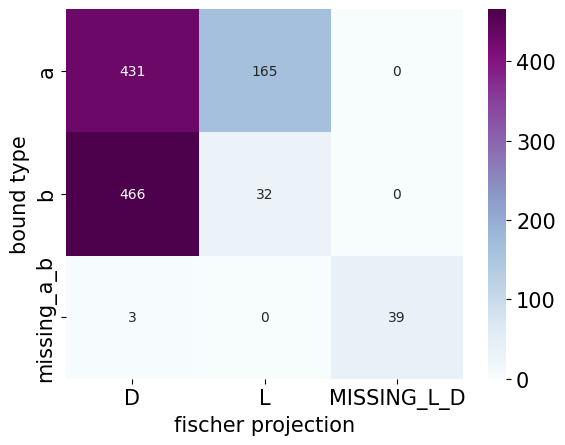

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
# Default heatmap
p1 = sns.heatmap(new_df_heat_map, annot=True, annot_kws={"size": 10}, cmap="BuPu", fmt='g')
p1.set_xlabel('fischer projection')
p1.set_ylabel('bound type')

In [28]:
linear_len = [5, 4, 3, 4, 4, 3, 3, 1, 5, 4, 3, 5, 1, 1, 1, 3, 3, 3, 1, 5, 7, 5,
       4, 5, 2, 2, 4, 4, 3, 1, 5, 5, 3, 4, 5, 3, 3, 1, 6, 3, 4, 3, 3, 4,
       3, 3, 2, 2, 1, 1, 6, 2, 4, 2, 2, 2, 6, 3, 1, 2, 4, 3, 1, 5, 1, 4,
       5, 3, 1, 3, 1, 4, 1, 4, 3, 6, 4, 1, 5, 5, 3, 2, 6, 1, 4, 6, 4, 4,
       3, 1, 5, 4, 3, 3, 3, 6, 2, 1, 1, 2, 2, 7, 3, 2, 3, 1, 6, 3, 3, 2,
       4, 2, 2, 4, 2, 1, 1, 4, 5, 3, 3, 2, 3, 1, 4, 1, 5, 2, 2, 4, 2, 3,
       2, 1, 3, 4, 2, 3, 3, 4, 5, 2, 4, 4, 3, 4, 1, 3, 3, 2, 5, 4, 4, 1,
       2, 5, 2, 3, 3, 3, 3, 2, 3, 2, 3, 1, 1, 1, 1, 5, 5, 3, 2, 4, 2, 3,
       6, 3, 4, 2, 2, 3, 5, 4, 1]

In [29]:
nonlinear_len = [ 4,  5,  8,  5,  6,  9,  7,  7,  5,  5,  3,  5,  5,  6,  3,  6,  8,
        9,  4,  4,  5,  4,  7,  5,  3,  3,  4,  6,  8, 10,  7,  5,  5,  3,
        6,  8,  8,  5,  6,  5,  8,  4,  6,  3,  5,  6,  9,  4,  4,  3, 11,
        9,  5,  3, 13,  3,  5,  7,  5,  6,  4,  7,  9, 10, 10,  8,  6,  7,
        2,  5,  6,  5,  4,  4,  5,  4, 10,  5,  3,  3,  8,  5,  5,  5,  4,
        5,  5,  6,  6,  4,  5,  9,  6,  7,  7,  5,  8,  7,  9,  6,  7,  6,
        5,  7,  5,  3,  6,  5,  9,  8,  6,  5,  7,  6,  7,  5]

In [30]:
all_len = np.concatenate([np.array(linear_len), np.array(nonlinear_len)])

In [31]:
all_len = np.sort(all_len)
len(all_len)

301

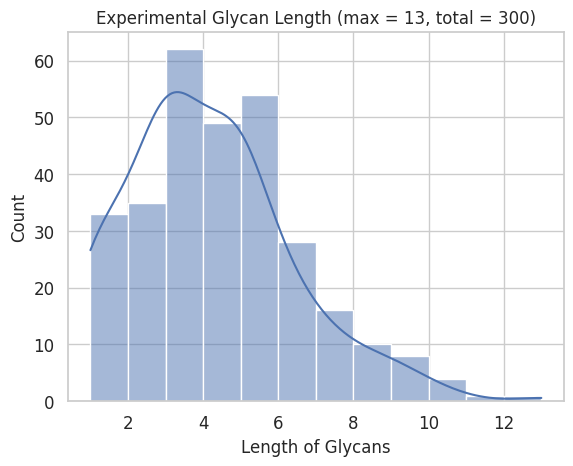

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", font_scale=1)

sns.histplot(all_len, kde=True, binwidth=1)

plt.xlabel('Length of Glycans')
plt.title('Experimental Glycan Length (max = 13, total = 300)')
plt.tick_params(labelsize=12)
plt.savefig('figures/general_visulization/glycan_length_experimental.png', dpi=300)
plt.show()


In [33]:
casper_g = os.listdir('data/directory_reformulate_combined/')

In [34]:
casper_list = []
for c_g in casper_g:
    temp_pdf = pd.read_csv(os.path.join('data/directory_reformulate_combined/', c_g))
    casper_list.append(np.max(temp_pdf['residual'].values))

In [35]:
np.max(casper_list), len(casper_list)

(12, 431)

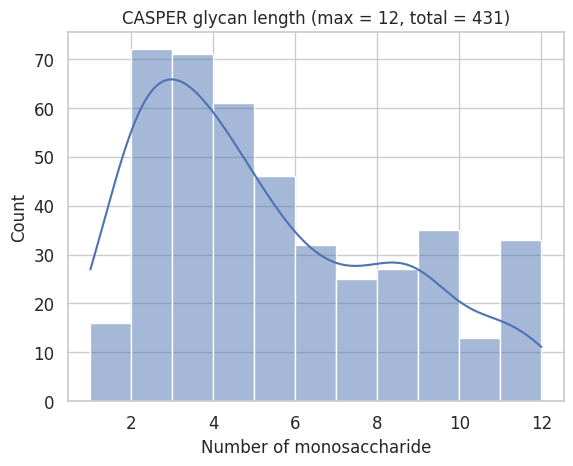

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(casper_list, kde=True, binwidth=1)

plt.xlabel('Number of monosaccharide')
plt.title('CASPER glycan length (max = 12, total = 431)')
plt.tick_params(labelsize=12)
plt.savefig('figures/general_visulization/glycan_length_casper.png', dpi=300)
plt.show()

##### frequency table

In [37]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
df_exp = pd.read_csv('matching_table/combined_all_formulated_monosaccharide_v2.csv')

In [38]:
mono_vals = df_exp['reformulated_standard_mono'].values

In [39]:
unique, counts = np.unique(mono_vals, return_counts=True)
counts = np.round(counts / len(mono_vals) * 100, 2)
df_tab1 = pd.DataFrame(np.asarray((unique, counts)).T)
df_tab1.columns = ['Glycoscience Monosaccharide Name', 'Glycoscience Monosaccharide Percentage']
df_tab1 = df_tab1.sort_values(by = ['Glycoscience Monosaccharide Percentage'], ascending=False, ignore_index=True)
df_tab1['Glycoscience Monosaccharide Percentage'] = [str(i) + '%' for i in df_tab1['Glycoscience Monosaccharide Percentage'].values]

In [95]:
df_tab1

,Glycoscience Monosaccharide Name,Glycoscience Monosaccharide Percentage
0,gal,19.39%
1,glc,17.72%
2,glcnac,12.02%
3,rha,10.79%
4,man,6.58%
5,kdo,4.74%
6,fuc,4.65%
7,glca,4.21%
8,missing_monosaccharide,4.04%
9,galnac,3.33%


In [40]:
casper_f = os.listdir('data/directory_reformulate_labels/')

temp_f = casper_f[0]

In [41]:
def sorting(lst):
    lst2 = sorted(lst, key=len, reverse=True)
    return lst2
glycan_list = ['gal', 'galnac', 'galn', 'gala', 'glc', 'glcnac', 'glcn', 'glca', 'fuc', 
               'man', 'mannac', 'mann', 'mana', 'kdn', 'neu5ac', 'xyl', 'idoa', 'neu5gc']

glycan_list_extend = ['gal', 'galnac', 'galn', 'gala', 'galanac', 'glc', 'glcnac', 'glcn', 'glca', 'fuc', 
                      'man', 'mannac', 'mann', 'mana', 'kdn', 'neu5ac', 'xyl', 'idoa', 'neu5gc', 
                      'kdo', 'kdn', 'quip',  'quinac', 'rhap', 'ara', 'gula', 'rib', 'neu5ac', 'tal', 'rha', 'rhanac',
                      'fucnac', 'rhanac', 'ido']
glycan_list_extend = sorting(glycan_list_extend)
# glycan_list_extend

In [42]:
len(df_exp)

1140

In [43]:
def count_occurance(temp_f):
    mono_list = temp_f.split('-')
    temp_list = []
    for i in mono_list:

        i_l = i.lower()
        i_l = i_l.replace('p', "", 1)
#         print(i_l)
        for j in glycan_list_extend:
    #         print(j)
            if j in i_l:
                temp_list.append(j)

                break
    return temp_list
        

In [44]:
all_list = []
for temp_f in casper_f:
    all_list.extend(count_occurance(temp_f))

In [121]:
all_list = pd.DataFrame(np.array(all_list))
unique_2, counts_2 = np.unique(all_list, return_counts=True)
counts_2 = np.round(counts_2 / len(all_list) * 100, 2)
df_tab2 = pd.DataFrame(np.asarray((unique_2, np.array(counts_2).astype(float)))).T

df_tab2.columns = ['CASPER Monosaccharide Name', 'CASPER Monosaccharide Percentage']
# df_tab2['CASPER Monosaccharide Percentage'].astype(float)
df_tab2 = df_tab2.sort_values(by = ['CASPER Monosaccharide Percentage'], ascending=False, ignore_index=True)
df_tab2['CASPER Monosaccharide Percentage'] = [str(i) + '%' for i in df_tab2['CASPER Monosaccharide Percentage'].values]

In [122]:
df_tab1.to_csv('figures/general_visulization/glycoscience_percentage.csv', index = False)
df_tab2.to_csv('figures/general_visulization/casper_percentage.csv', index = False)

In [126]:
len(all_list)

2259

In [71]:
len(unique_2), len(counts_2), type(counts_2[0])

(10, 10, numpy.float64)

In [49]:
'original_striong'.replace('o', "", 1)

'riginal_striong'